# ES 0

Some trials with pdfs and histograms

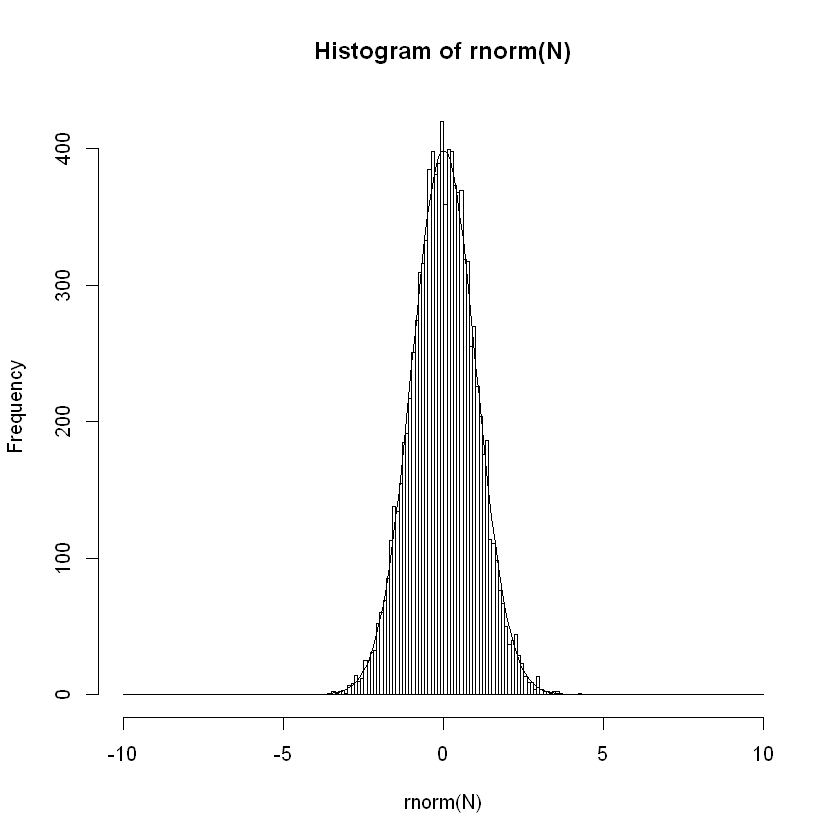

In [31]:
N <- 10000

xlow <- 10

xlow <- -10

xhigh <- 10

brk <- seq(xlow, xhigh, 0.1)

hist(rnorm(N), xlim=range(xlow,xhigh), breaks<-brk)

lines(brk, dnorm(brk) * N * (0.1))

# EX 1

In [32]:
x <- c(15.58,15.9,16,16.1,16.2)

p1 <- c(0.15,0.21,0.35,0.15,0.14)

p2 <- c(0.14,0.05,0.64,0.08,0.09)

data <- rbind.data.frame(rbind.data.frame(x,p1),p2)

colnames(data) <- c(1:5)

rownames(data) <-c("X","p1","p2")

data

,1,2,3,4,5
X,15.58,15.90,16.00,16.10,16.20
p1,0.15,0.21,0.35,0.15,0.14
p2,0.14,0.05,0.64,0.08,0.09


### EXPECTED VALUE

In [33]:
avg <- c(sum(data[1,] * data[2,]),sum(data[1,] * data[3,]))

avg

[1] 15.9590 15.9622

### VARIANCE

In [34]:
var1 <- sum(data[1,] ** 2 * data[2,]) - (sum( data[1,]  * data[2,] ))** 2

var2 <- sum(data[1,] ** 2 * data[3,]) - (sum( data[1,]  * data[3,] ))** 2

var <- c(var1,var2)

# EX 2

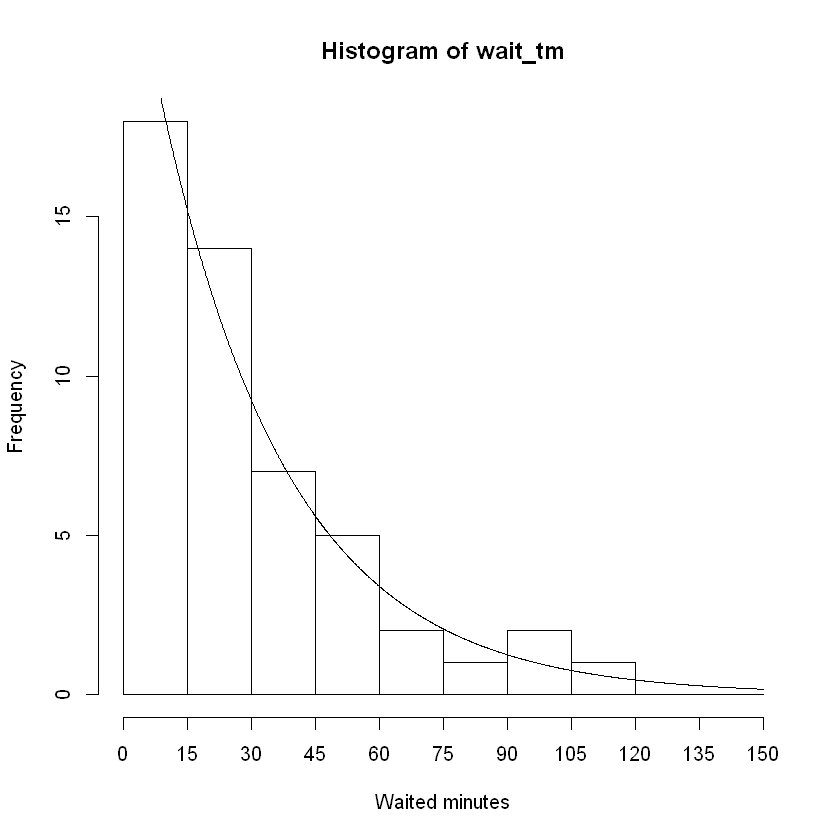

In [35]:
wat <- 30

people <- 50

wait_tm <- rexp(people, 1/wat)

xticks <- 15

xlim <- 150

hist(wait_tm, breaks=seq(0,xlim, xticks), xlab="Waited minutes", xaxt='n')

axis(side=1, at=seq(0,xlim, xticks), labels=seq(0,xlim,xticks))

xs <- seq(0, xlim, minutes/100)

lines(xs, dexp(xs, 1/wat) * people * xticks)

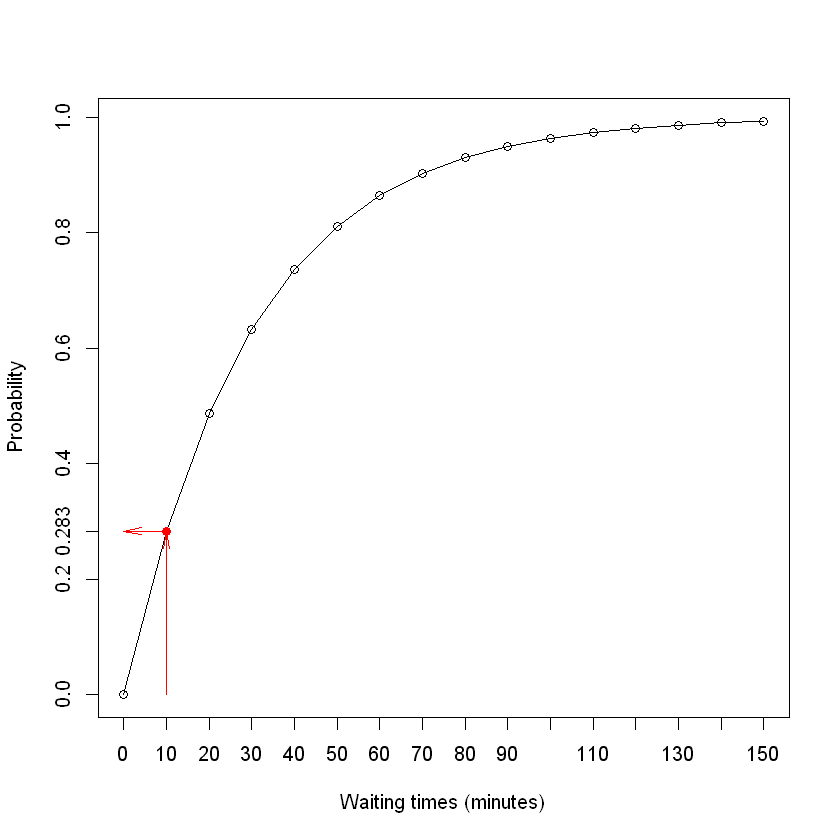

In [36]:
#setting the parameters
minutes <- 10
Waiting_time <- seq(0,150,minutes)
quant <- Waiting_time
probs <- pexp(quant, 1/wat)
Probability <- pexp(quant, 1/wat)

#plotting..
plot(Waiting_time, Probability , xaxt='n', xlab = "Waiting times (minutes)", ylab = "Probability")
#setting the ticks on the x axis
lines(quant, pexp(quant, 1/wat))
axis(side=1, at=seq(0, xlim, by = minutes), labels=seq(0, xlim, by = minutes))
#highlighting the point of interest
points(quant[2], pexp(quant[2], 1/wat), col='red', pch = 19)
arrows(minutes, 0, minutes, pexp(quant[2], 1/wat), length = 0.15, angle = 10, code = 2, col = 'red')
arrows(minutes, pexp(quant[2], 1/wat), 0, pexp(quant[2], 1/wat),  length = 0.15, angle = 10, code = 2, col = 'red')
#adding a tick where the value of the probability is
axis(side=2, at=pexp(quant[2], 1/wat), labels=format(round(pexp(quant[2],1/wat), 3), nsmall = 3))
axis(side=1, at=seq(0, xlim, by = minutes), labels=seq(0, xlim, by = minutes))

In [37]:
avg <- mean(wait_tm)

avg

[1] 29.13045

In [38]:
1-pexp(quant[7], 1/wat)

[1] 0.1353353

# EX 3

In [39]:
Typo_per_page <- 1/3

Prob_at_least_one_error <- 1 - ppois(0, Typo_per_page)

Prob_at_least_one_error

[1] 0.2834687

In [40]:
# just to check: 
1-exp(-1/3)

[1] 0.2834687

P(>=1|lambda) =  0.283468689426211 


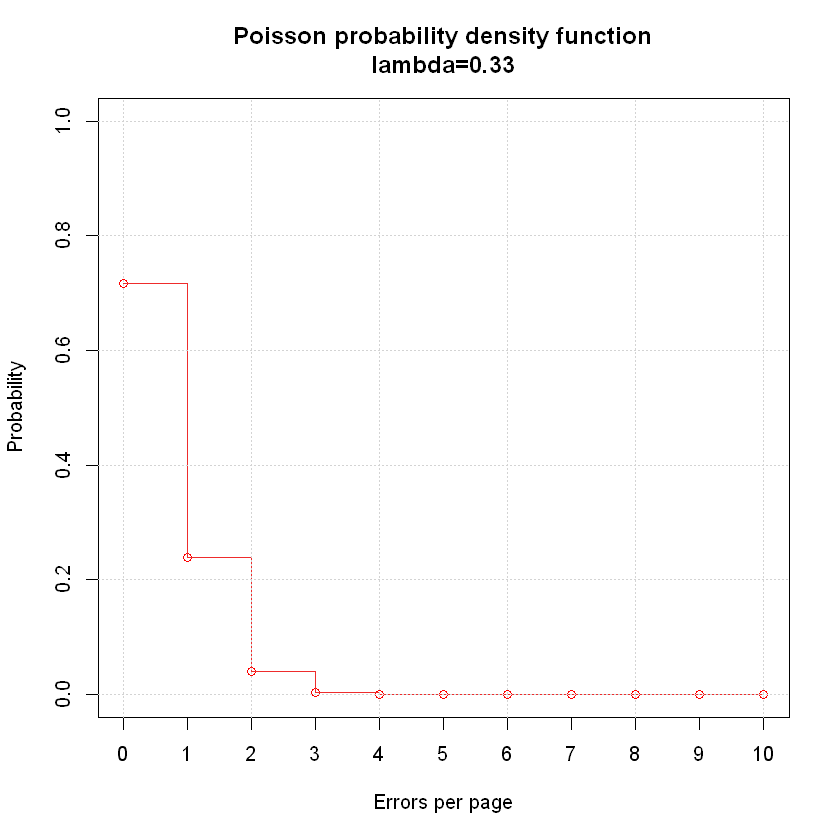

In [76]:
#plotting the pdf
lambda <- Typo_per_page
x <- 0:10
ap <- dpois(x,lambda)

plot(x, ap, bg = 8, col = 2, main = sprintf("Poisson probability density function\nlambda=%.2f",lambda), ylim=c(0,1),
    ylab = "Probability", xlab = "Errors per page")
lines(x,ap, col='firebrick2', type = 's')
axis(side = 1, at = x, labels = x)
grid()

cat(paste(c("P(>=1|lambda) = ", 1 - ap[1],'\n')))

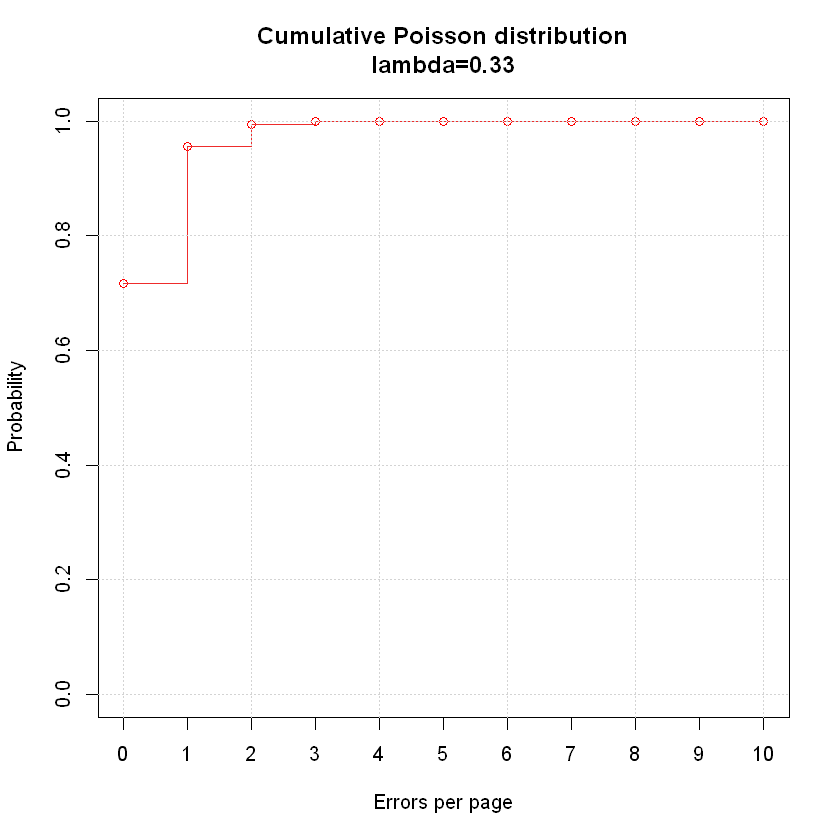

In [72]:
lambda <- Typo_per_page
x <- 0:10
ap <- ppois(x,lambda)

plot(x, ap, bg = 8, col = 2, main = sprintf("Cumulative Poisson distribution\nlambda=%.2f",lambda), ylim=c(0,1),
    ylab = "Probability", xlab = "Errors per page")
lines(x,ap, col='firebrick2', type = 's')
axis(side = 1, at = x, labels = x)
grid()

# EX 4

In [182]:
Number_of_cards <- 52
Number_of_aces <- 4
p <- Number_of_aces/Number_of_cards
trials <- 10
#each extraction is a Bernoulli process; we have to miss 10 times in a row
prob <- (1-p)^trials
prob

[1] 0.4491371

# EX 5

In [157]:
#installing the plyr package
#install.packages("plyr", repos='http://cran.us.r-project.org')

In [158]:
#plyr allows the use of the count function
#library("plyr")

In [88]:
#importing the dataset
X <- read.csv2('rilesemei_30062018_0_eng.csv', header = TRUE, sep=";", dec=".", stringsAsFactors=FALSE)

In [155]:
names <- c("Piemonte","Valle d'Aosta","Lombardia","Trentino A. A.",
           "Veneto","Friuli V. Giulia","Liguria","Emilia Romagna",
           "Toscana","Umbria","Marche","Lazio","Abruzzi","Molise","Campania",
          "Puglie","Basilicata","Calabria","Sicilia","Sardegna")
counts <- count(X$Region)

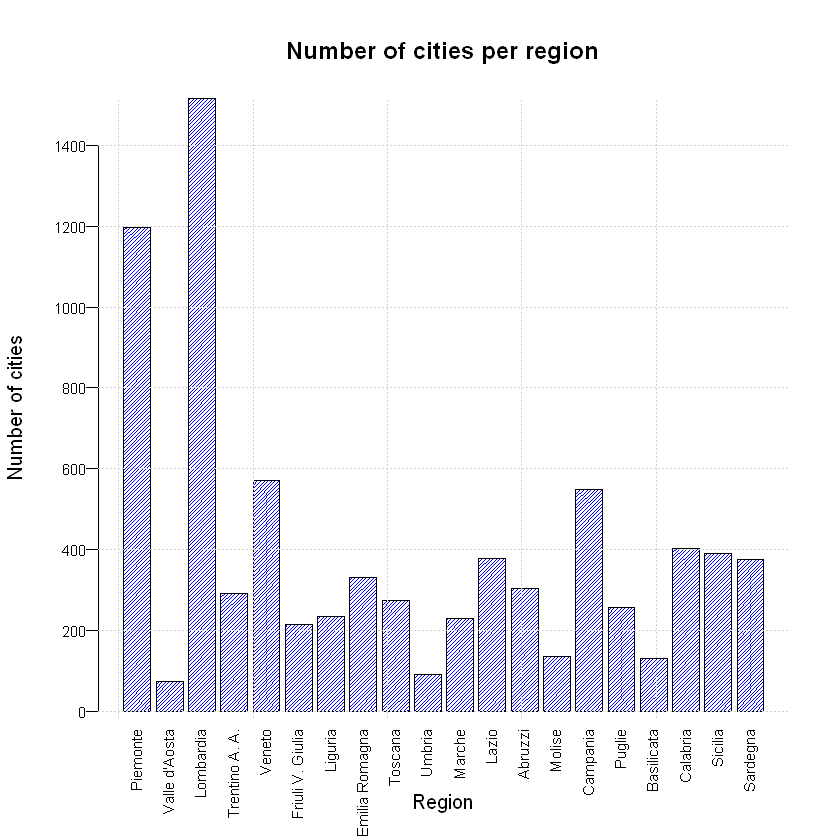

In [156]:
par(mar=c(5.1, 4.1, 4.1, 2.1), mgp=c(3, 0.5, 0), las=0)
barplot(counts$freq, names.arg = names, las = 2, density = 50, col = "blue", 
        main = "Number of cities per region", xlab = "Region", ylab = "Number of cities",
        xpd = TRUE, cex.names = 0.75, cex.axis = 0.75)
grid()